# Tugas Data Mining Asosiasi metode Eclat

### Import Data

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

## 1. Data Understanding

In [99]:
import pandas as pd
from IPython.display import display

# Membaca file Excel ke dalam DataFrame
file_path = 'e:\data mining.xlsx'  
df = pd.read_excel(file_path) 

# Menetapkan baris pertama dari DataFrame sebagai header/kolom
df.columns = df.iloc[0]  
df = df.drop(0).reset_index(drop=True)  # Menghapus baris pertama (yang sudah menjadi header) dan mereset index

# Mengganti nilai kosong atau NaN dengan '-'
df.fillna('-', inplace=True)

# Jika ada kolom 'TGL_REG', mengonversinya ke format datetime
if 'TGL_REG' in df.columns:
    try:
        # Mengubah nilai di kolom 'Tanggal Transaksi' ke tipe datetime dan hanya mengambil tanggalnya
        df['TGL_REG'] = pd.to_datetime(df['TGL_REG'], errors='coerce').dt.date
    except Exception as e:
        # Menangani kesalahan jika terjadi error dalam proses konversi
        print(f"Error converting 'TGL_REG': {e}")
    
    # Mengubah nilai NaT (tanggal tidak valid) menjadi '-' agar data tetap konsisten
    df['TGL_REG'] = df['TGL_REG'].astype(str).replace('NaT', '-')

# Mengganti nama kolom untuk data item dengan nama yang lebih deskriptif ('Item 1', 'Item 2', dst.)
item_columns = ['No.', 'TGL_REG', 'CHANEL', 'CITEM_SPEEDY', 'Deskripsi', 'A', 'B', 'Transaksi']
df.rename(columns=dict(zip(df.columns[0:10], item_columns)), inplace=True)  # Mengubah nama kolom di rentang yang relevan

# Menampilkan DataFrame menggunakan IPython display tanpa menyimpan hasilnya ke file
# df.style.hide(axis='index') digunakan untuk menyembunyikan kolom index saat ditampilkan
display(df.style.hide(axis='index'))


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_11036\3910958550.py:5: SyntaxWarning: invalid escape sequence '\d'
  file_path = 'e:\data mining.xlsx'
c:\Users\WINDOWS 10\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\WINDOWS 10\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


No.,TGL_REG,CHANEL,CITEM_SPEEDY,Deskripsi,A,B,Transaksi
2,2021-01-01 00:00:00,Landing Page CRL,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"
3,2021-01-01 00:00:00,Landing Page CRL,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"
4,2021-01-01 00:00:00,Landing Page CRL,INETF50M,C20487 ~ CS20 - Indihome 3P Internet + Phone + TV (INET),A72,B24,"A72,B24"
5,2021-01-01 00:00:00,Landing Page CRL,INETF20M,C20490 ~ CS20 - Indihome 2P Internet + Phone (INET),A74,B20,"A74,B20"
6,2021-01-01 00:00:00,Landing Page CRL,INETF20M,C19195 ~ CS19 - Single Play INET,A42,B20,"A42,B20"
7,2021-01-02 00:00:00,Landing Page CRL,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"
8,2021-01-02 00:00:00,Landing Page CRL,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"
9,2021-01-02 00:00:00,Landing Page CRL,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"
10,2021-01-02 00:00:00,Landing Page CRL,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"
11,2021-01-02 00:00:00,Landing Page CRL,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"


## 2. Data Preparation

In [100]:
# Mengetahui tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   No.           1044 non-null   int64         
 1   TGL_REG       1044 non-null   datetime64[ns]
 2   CHANEL        1044 non-null   object        
 3   CITEM_SPEEDY  1044 non-null   object        
 4   Deskripsi     1044 non-null   object        
 5   A             1044 non-null   object        
 6   B             1044 non-null   object        
 7   Transaksi     1044 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 65.4+ KB


In [101]:
#Missing value
df.isna().sum()

0
No.             0
TGL_REG         0
CHANEL          0
CITEM_SPEEDY    0
Deskripsi       0
A               0
B               0
Transaksi       0
dtype: int64

In [102]:
#Mendeteksi duplikat data
df.duplicated().sum()

0

In [103]:
outlier_criteria.sum()

c:\Users\WINDOWS 10\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\WINDOWS 10\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\Users\WINDOWS 10\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\Users\WINDOWS 10\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'outlier_criteria' is not defined

In [20]:
# Tabulasi frekuensi 
df['CHANEL'].value_counts()

CHANEL
Landing Page CRL    1044
Name: count, dtype: int64

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_11036\885784771.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cplotd = sns.countplot(x = 'CHANEL', data = df,


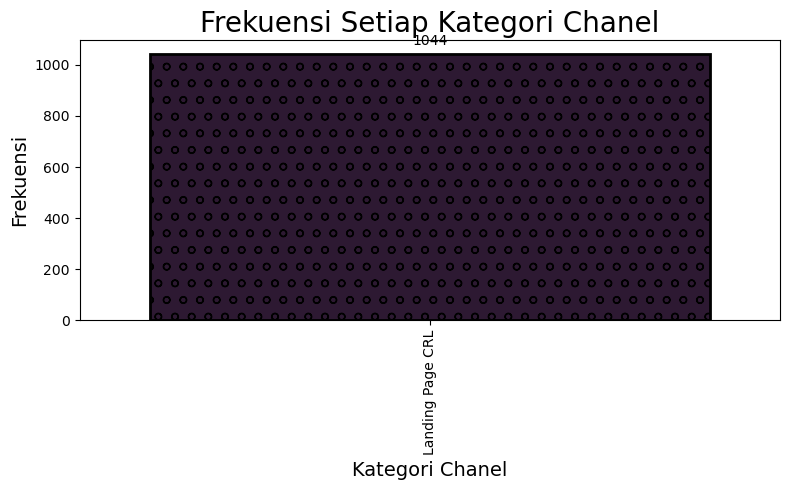

In [42]:
plt.figure(figsize=(8,5), dpi=100)

plt.title("Frekuensi Setiap Kategori Chanel", size = 20)

cplotd = sns.countplot(x = 'CHANEL', data = df,
                       order = df['CHANEL'].value_counts().index,
                       palette = 'twilight', lw = 2, ec = 'black', #untuk warna cari di google pallate matplotib python
                       hatch = 'o')

for p in cplotd.patches:
    counter = f"{p.get_height():.0f}"  # Use an f-string to format the counter
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    cplotd.annotate(counter, (x, y), ha = 'center',
                    va = 'center', xytext = (0,9),
                    textcoords = 'offset points')
    
plt.xticks (rotation = 90)
plt.xlabel("Kategori Chanel", size = 14)
plt.ylabel("Frekuensi", size = 14)
plt.tight_layout();

## 3. Cleaning data

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

0
No.             0
TGL_REG         0
CHANEL          0
CITEM_SPEEDY    0
Deskripsi       0
A               0
B               0
Transaksi       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   No.           1044 non-null   int64         
 1   TGL_REG       1044 non-null   datetime64[ns]
 2   CHANEL        1044 non-null   object        
 3   CITEM_SPEEDY  1044 non-null   object        
 4   Deskripsi     1044 non-null   object        
 5   A             1044 non-null   object        
 6   B             1044 non-null   object        
 7   Transaksi     1044 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 65.4+ KB


In [10]:
numerical_cols = ['No','TGL_REG'] #menghitung mean
for col in numerical_cols:
    print(f'{col}:{df[col].mean():2f}')

KeyError: 'No'

In [24]:
#imputasi dengan nilai mean
for col in numerical_cols:
    df[col].fillna(df[col].mean(),inplace=True)

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_5480\4066995689.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [29]:
df.describe()

,No,TGL_REG
count,1045.000000,1045
mean,523.000000,2021-06-06 16:50:04.019138560
min,1.000000,2021-01-01 00:00:00
25%,262.000000,2021-03-12 00:00:00
50%,523.000000,2021-06-12 00:00:00
75%,784.000000,2021-08-13 00:00:00
max,1045.000000,2021-12-30 00:00:00
std,301.809819,NaN


In [31]:
df = df.drop(['No', 'TGL_REG', 'CHANEL'], axis=1)
df.head()

,CITEM_SPEEDY,DESKRIPSI,A,B,TRANSAKSI
0,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"
1,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"
2,INETF20M,C20492 ~ CS20 - Indihome 2P Internet + TV (INET),A75,B20,"A75,B20"
3,INETF50M,C20487 ~ CS20 - Indihome 3P Internet + Phone +...,A72,B24,"A72,B24"
4,INETF20M,C20490 ~ CS20 - Indihome 2P Internet + Phone (...,A74,B20,"A74,B20"


## 4. Visualisasi Data

In [51]:
df['A'].value_counts()

A
A75     436
A42     284
A74     127
A72     103
A123     23
A76      17
A131     15
A94      10
A118     10
A81       6
A115      6
A132      2
A119      2
A66       1
A102      1
A122      1
Name: count, dtype: int64

In [53]:
df['Deskripsi'].value_counts()

Deskripsi
C20492 ~ CS20 - Indihome 2P Internet + TV (INET)                                    436
C19195 ~ CS19 - Single Play INET                                                    284
C20490 ~ CS20 - Indihome 2P Internet + Phone (INET)                                 127
C20487 ~ CS20 - Indihome 3P Internet + Phone + TV (INET)                            103
C21183 ~ CS21 - New IndiHome 2P 2021 Internet Phone High Competition (INET)          23
C20493 ~ CS20 - Indihome 2P Internet + TV (USEE)                                     17
C21211 ~ CS21 - IndiHome 2P Internet TV 2021 (INET 30 Mbps High Competition)         15
C21174 ~ CS21 - New IndiHome 3P 2021 High Competition (INET 1)                       10
C21013 ~ CS21 - IndiHome Penawaran melalui Digital Channel 2021 (INET)               10
C21160 ~ CS21 - IndiHome 2P Digital Channel 2021 (INET)                               6
C20514 ~ CS20 - IndiHome Gamer (INET)                                                 6
C21213 ~ CS21 - IndiHo

In [56]:
df['B'].value_counts()

B
B20    749
B24     95
B22     81
B34     42
B17     27
B23     27
B36     12
B32      5
B16      4
B15      1
B13      1
Name: count, dtype: int64

In [58]:
df['CITEM_SPEEDY'].value_counts()

CITEM_SPEEDY
INETF20M     749
INETF50M      95
INETF30M      81
INETFN30M     42
INETF100M     27
INETF40M      27
INETFN50M     12
INETFN20M      5
INETC50M       4
INETC20M       1
INETC100M      1
Name: count, dtype: int64

In [59]:
df['Transaksi'].value_counts()

Transaksi
A75,B20     355
A42,B20     235
A74,B20      90
A72,B20      63
A75,B22      34
A42,B24      33
A75,B24      31
A74,B22      18
A72,B24      17
A42,B17      16
A123,B34     16
A131,B34     15
A76,B22      13
A72,B22      13
A75,B23      13
A74,B24      12
A118,B34     10
A123,B36      7
A72,B23       7
A115,B32      5
A94,B20       5
A76,B23       4
A81,B16       4
A74,B17       4
A72,B17       3
A94,B22       3
A74,B23       3
A75,B17       3
A94,B24       2
A132,B36      2
A122,B36      1
A115,B34      1
A119,B36      1
A66,B20       1
A102,B36      1
A81,B15       1
A81,B13       1
A119,B17      1
Name: count, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   No.           1044 non-null   int64         
 1   TGL_REG       1044 non-null   datetime64[ns]
 2   CHANEL        1044 non-null   object        
 3   CITEM_SPEEDY  1044 non-null   object        
 4   Deskripsi     1044 non-null   object        
 5   A             1044 non-null   object        
 6   B             1044 non-null   object        
 7   Transaksi     1044 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 65.4+ KB


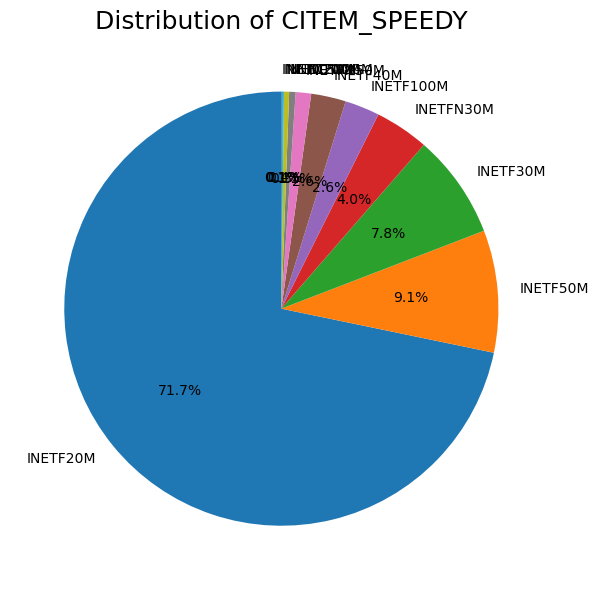

In [70]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.title("Distribution of CITEM_SPEEDY", size=18)

# Get the unique values and counts of the CITEM_SPEEDY column
citem_speedy_counts = df['CITEM_SPEEDY'].value_counts()

# Create the pie chart
plt.pie(citem_speedy_counts, labels=citem_speedy_counts.index, autopct='%1.1f%%', startangle=90)

# Show the plot
plt.tight_layout()
plt.show()

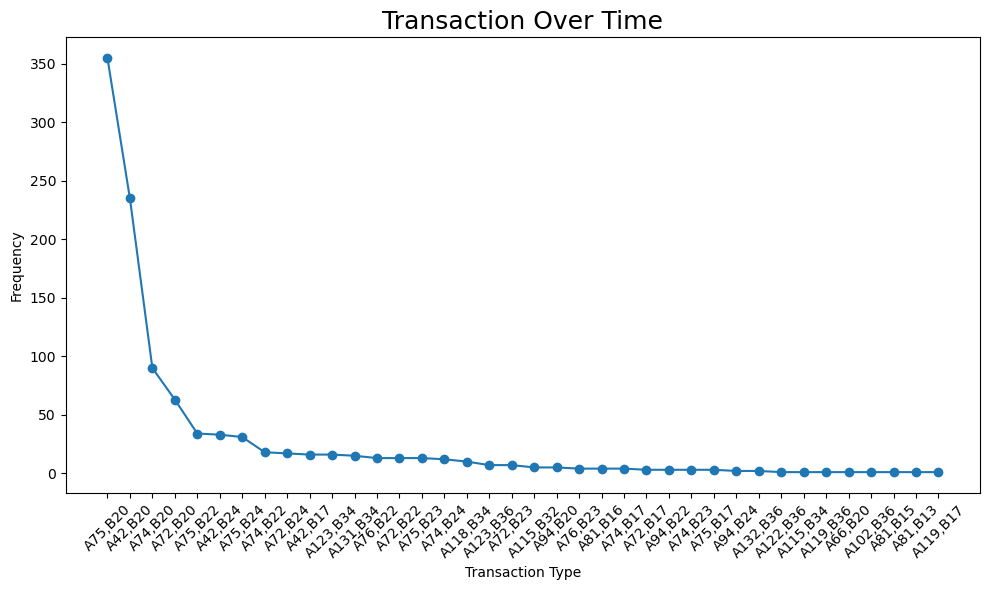

In [105]:
# Create a line chart
plt.figure(figsize=(10, 6))
plt.title("Transaction Over Time", size=18)

# Get the unique values and counts of the Transaksi column
transaksi_counts = df['Transaksi'].value_counts()

# Create the line chart
plt.plot(transaksi_counts.index, transaksi_counts.values, marker='o')

# Set the x-axis label
plt.xlabel("Transaction Type")

# Set the y-axis label
plt.ylabel("Frequency")
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

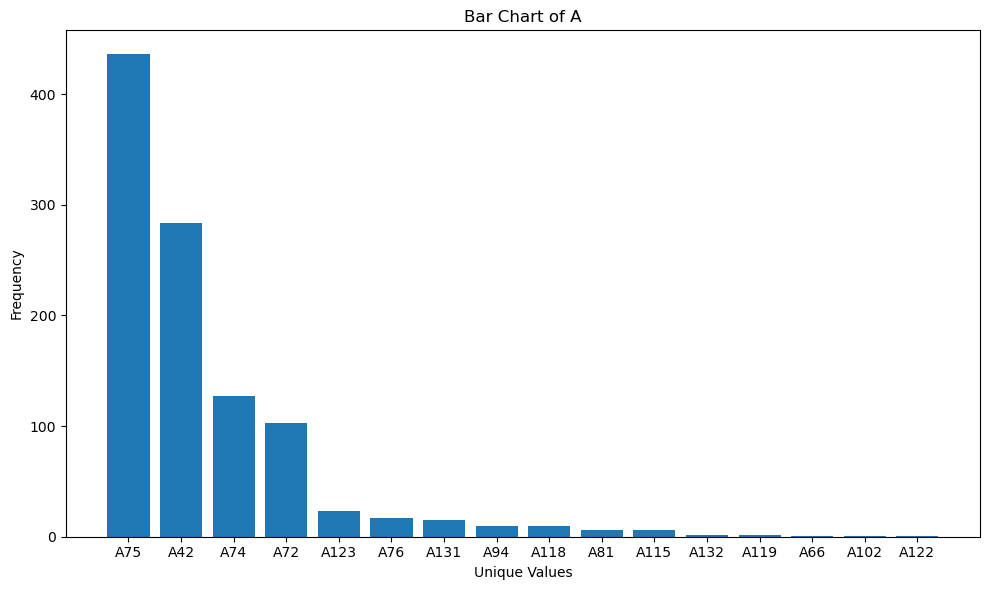

In [79]:
import matplotlib.pyplot as plt

# Get the unique values and their counts in the A column
a_counts = df['A'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
ax.bar(a_counts.index, a_counts.values)

# Set title and labels
ax.set_title("Bar Chart of A")
ax.set_xlabel("Unique Values")
ax.set_ylabel("Frequency")

# Show the plot
plt.tight_layout()
plt.show()

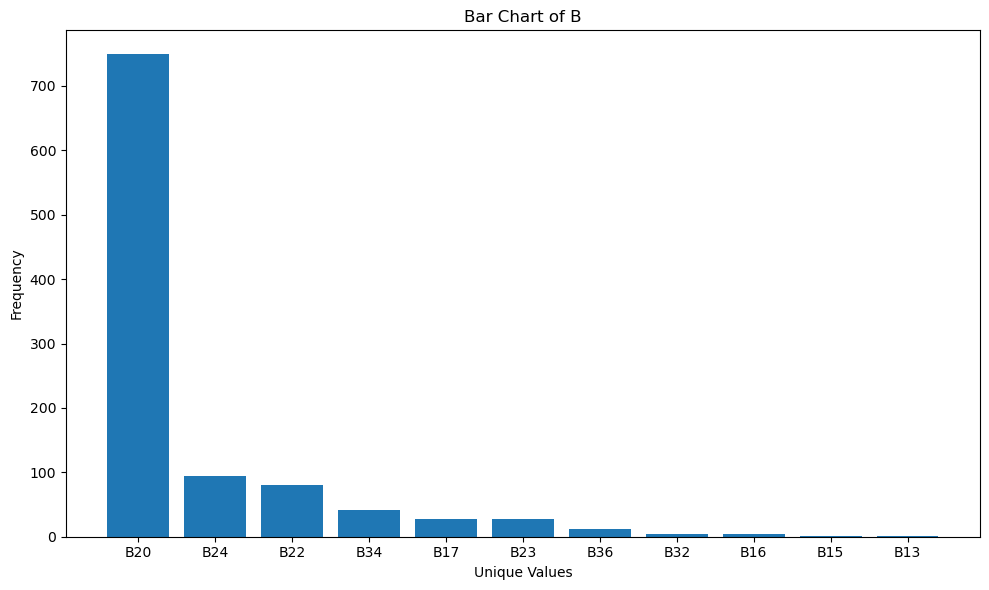

In [80]:
import matplotlib.pyplot as plt

# Get the unique values and their counts in the B column
b_counts = df['B'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
ax.bar(b_counts.index, b_counts.values)

# Set title and labels
ax.set_title("Bar Chart of B")
ax.set_xlabel("Unique Values")
ax.set_ylabel("Frequency")

# Show the plot
plt.tight_layout()
plt.show()

##Processing Data

In [89]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
   - -------------------------------------- 0.0/1.4 MB 279.3 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1.4 MB 544.7 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.4 MB 697.2 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 874.6 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 967.8 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.4 MB 967.1 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 946.4 kB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.4 MB 929.0 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.4 MB 932.7 kB/s eta 0:00:02
   ----------

In [104]:
from mlxtend.frequent_patterns import eclat
from mlxtend.frequent_patterns import association_rules

# Assume that your transaction data is stored in a Pandas DataFrame called `df`
# and that each row represents a transaction, with each column representing a product.

# One-hot encode the data to create a binary matrix
ohe_df = pd.get_dummies(df, columns=['A', 'B', 'CHANEL', 'CITEM_SPEEDY', 'Deskripsi', 'Transaksi'])

# Create a frequent itemset using the Eclat algorithm
frequent_itemsets = eclat(ohe_df, min_support=0.05, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Print the rules
print(rules)

ImportError: cannot import name 'eclat' from 'mlxtend.frequent_patterns' (c:\Users\WINDOWS 10\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\__init__.py)